In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
states = gpd.read_file('tl_2018_us_state/tl_2018_us_state.shp')

In [3]:
tx = states[states['NAME'] == 'Texas']

In [4]:
congress = gpd.read_file('tigris/usa_congressional_districts/congressional_districts_2019/congressional_districs_2019.shp')
cbsa = gpd.read_file('tigris/usa_core_base_statistical_areas/cbsa_2019/cbsa_2019.shp')
counties = gpd.read_file('tigris/usa_counties/counties_2019/counties_2019.shp')
urban_areas = gpd.read_file('tigris/usa_urban_areas/urban_areas_2019/urban_areas_2019.shp')
zcta = gpd.read_file('tigris/usa_zcta/usa_zcta_2019/zcta_2019.shp')

In [5]:
tx.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [6]:
congress.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [55]:
def shape_mask(shapefile, mask, shapely_op):
    
    try:
        assert shapefile.crs == mask.crs
    except AssertionError:
        mask = mask.to_crs(shapefile.crs)
        
    masked_shape = gpd.sjoin(shapefile, mask, op=shapely_op, how='inner')
    
    return masked_shape

In [56]:
tx_zcta = shape_mask(zcta, tx, shapely_op='within')

In [57]:
tx_zcta.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,...,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
178,75098,75098,B5,G6350,S,85315034.0,20354151.0,+33.0121346,-096.5349358,"POLYGON ((-96.60198 33.01127, -96.60061 33.011...",...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238
179,75101,75101,B5,G6350,S,2130983.0,0.0,+32.2700320,-096.7024944,"POLYGON ((-96.71534 32.27898, -96.71297 32.280...",...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238
180,75102,75102,B5,G6350,S,157209930.0,1547624.0,+32.0579379,-096.6325473,"POLYGON ((-96.72234 32.04348, -96.72231 32.043...",...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238
181,75103,75103,B5,G6350,S,516408848.0,8411316.0,+32.5169296,-095.8835471,"POLYGON ((-96.07580 32.56362, -96.07264 32.562...",...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238
182,75104,75104,B5,G6350,S,101138796.0,643670.0,+32.5848142,-096.9723118,"POLYGON ((-97.06551 32.54908, -97.06427 32.549...",...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238


<AxesSubplot:>

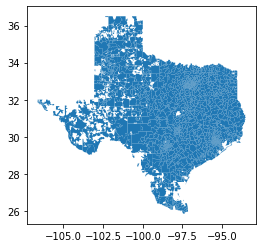

In [58]:
tx_zcta.plot()

In [27]:
tx_zcta.to_file('/Users/kpierce/CooksProTX/spatial/tigris/texas_zcta/texas_zcta_2019.shp')

<AxesSubplot:>

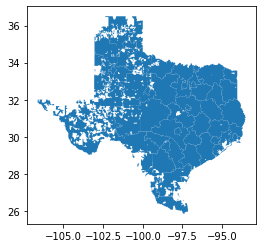

In [28]:
tx_zcta['three_digit_zcta'] = [str(i)[0:3] for i in tx_zcta['GEOID10']]
tx_three_digit_zcta = tx_zcta.dissolve(by='three_digit_zcta').reset_index()
tx_three_digit_zcta.plot()

In [29]:
tx_three_digit_zcta.head()

,three_digit_zcta,geometry,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,...,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,750,"MULTIPOLYGON (((-97.03749 32.61846, -97.03728 ...",75098,75098,B5,G6350,S,85315034.0,20354151.0,+33.0121346,...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238
1,751,"POLYGON ((-96.72234 32.04348, -96.72231 32.043...",75101,75101,B5,G6350,S,2130983.0,0.0,+32.2700320,...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238
2,752,"MULTIPOLYGON (((-96.94323 32.66223, -96.94323 ...",75208,75208,B5,G6350,S,15386497.0,13082.0,+32.7531409,...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238
3,753,"POLYGON ((-96.84234 32.81491, -96.84215 32.814...",75390,75390,B5,G6350,S,13392.0,0.0,+32.8141640,...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238
4,754,"POLYGON ((-95.54934 32.81183, -95.54823 32.811...",75482,75482,B5,G6350,S,809149314.0,49316632.0,+33.1679680,...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238


In [30]:
tx_three_digit_zcta.columns

Index(['three_digit_zcta', 'geometry', 'ZCTA5CE10', 'GEOID10', 'CLASSFP10',
       'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'index_right', 'REGION', 'DIVISION', 'STATEFP', 'STATENS',
       'GEOID', 'STUSPS', 'NAME', 'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON'],
      dtype='object')

In [31]:
tx_three_digit_zcta.columns = ['GEOID_10', 'geometry', 'ZCTA5CE10', 'original_GEOID10', 'CLASSFP10',
       'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'index_right', 'REGION', 'DIVISION', 'STATEFP', 'STATENS',
       'GEOID', 'STUSPS', 'NAME', 'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON']

In [32]:
tx_three_digit_zcta.to_file('/Users/kpierce/CooksProTX/spatial/tigris/texas_zcta/texas_three_digit_zcta.shp')

In [39]:
tx_counties = counties[counties['STATEFP'] == '48']

<AxesSubplot:>

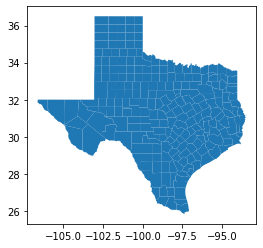

In [40]:
tx_counties.plot()

In [43]:
tx_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
7,48,327,01383949,48327,Menard,Menard County,06,H1,G4020,None,None,None,A,2.336238e+09,6.135590e+05,+30.8852677,-099.8588613,"POLYGON ((-99.82187 31.08721, -99.81877 31.087..."
11,48,189,01383880,48189,Hale,Hale County,06,H1,G4020,352,38380,None,A,2.602109e+09,2.466780e+05,+34.0684364,-101.8228879,"POLYGON ((-102.08763 34.02656, -102.08779 34.0..."
13,48,011,01383791,48011,Armstrong,Armstrong County,06,H1,G4020,108,11100,None,A,2.354582e+09,1.221958e+07,+34.9641790,-101.3566363,"POLYGON ((-101.62501 35.01509, -101.62492 35.0..."
35,48,057,01383814,48057,Calhoun,Calhoun County,06,H1,G4020,544,38920,None,A,1.312707e+09,1.361885e+09,+28.4417191,-096.5795739,"POLYGON ((-96.87329 28.62291, -96.87148 28.624..."
38,48,077,01383824,48077,Clay,Clay County,06,H1,G4020,None,48660,None,A,2.819870e+09,7.250854e+07,+33.7859042,-098.2129174,"POLYGON ((-98.42308 33.94453, -98.42308 33.944..."


In [44]:
tx_counties.columns = ['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEO_ID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry']

In [45]:
tx_counties.to_file('/Users/kpierce/CooksProTX/spatial/tigris/texas_zcta/texas_counties.shp')

In [46]:
congress.head()

,STATEFP,CD116FP,GEOID,NAMELSAD,LSAD,CDSESSN,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,27,07,2707,Congressional District 7,C2,116,G5200,N,8.658130e+10,5.058057e+09,+46.5530202,-095.6759048,"POLYGON ((-97.23909 48.96826, -97.23909 48.968..."
1,27,02,2702,Congressional District 2,C2,116,G5200,N,6.314305e+09,2.412794e+08,+44.4789680,-092.8530418,"POLYGON ((-93.91131 44.54651, -93.91024 44.548..."
2,27,06,2706,Congressional District 6,C2,116,G5200,N,7.460443e+09,4.087265e+08,+45.3368069,-093.8520551,"POLYGON ((-94.64041 45.37072, -94.64039 45.371..."
3,27,08,2708,Congressional District 8,C2,116,G5200,N,7.228214e+10,1.244816e+10,+47.2503370,-092.9638699,"POLYGON ((-95.18322 47.41277, -95.16598 47.412..."
4,17,01,1701,Congressional District 1,C2,116,G5200,N,6.691837e+08,2.067924e+06,+41.5466708,-087.8357472,"POLYGON ((-88.13677 41.42285, -88.13633 41.422..."


In [49]:
texas_congress = congress[congress['STATEFP'] == '48']

In [51]:
texas_congress.to_file('/Users/kpierce/CooksProTX/spatial/tigris/texas_congress.shp')

<AxesSubplot:>

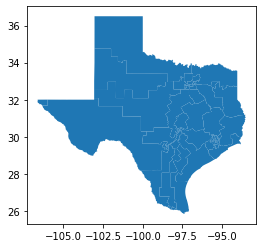

In [50]:
texas_congress.plot()

In [47]:
cbsa.head()

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,122,12020,12020,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",M1,1,G3110,2.654602e+09,26140309.0,+33.9439840,-083.2138965,"POLYGON ((-83.53739 33.96591, -83.53184 33.968..."
1,122,12060,12060,"Atlanta-Sandy Springs-Alpharetta, GA","Atlanta-Sandy Springs-Alpharetta, GA Metro Area",M1,1,G3110,2.249494e+10,387716575.0,+33.6937280,-084.3999113,"POLYGON ((-85.33823 33.65312, -85.33842 33.654..."
2,428,12100,12100,"Atlantic City-Hammonton, NJ","Atlantic City-Hammonton, NJ Metro Area",M1,1,G3110,1.438777e+09,301268696.0,+39.4693555,-074.6337591,"POLYGON ((-74.85675 39.42076, -74.85670 39.420..."
3,426,12120,12120,"Atmore, AL","Atmore, AL Micro Area",M2,2,G3110,2.448115e+09,20504948.0,+31.1222867,-087.1684097,"POLYGON ((-87.61542 31.04100, -87.61541 31.041..."
4,258,12140,12140,"Auburn, IN","Auburn, IN Micro Area",M2,2,G3110,9.397320e+08,2657419.0,+41.4011894,-085.0001854,"POLYGON ((-85.19295 41.38001, -85.19296 41.381..."


In [59]:
texas_cbsa = shape_mask(cbsa, tx, shapely_op='intersects')

<AxesSubplot:>

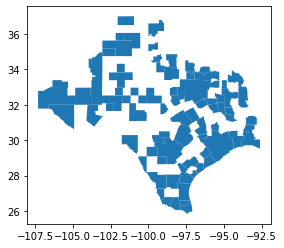

In [60]:
texas_cbsa.plot()

In [63]:
texas_cbsa.head()

,CSAFP,CBSAFP,GEOID_left,NAME_left,NAMELSAD,LSAD_left,MEMI,MTFCC_left,ALAND_left,AWATER_left,...,GEOID_right,STUSPS,NAME_right,LSAD_right,MTFCC_right,FUNCSTAT,ALAND_right,AWATER_right,INTPTLAT_right,INTPTLON_right
10,None,12420,12420,"Austin-Round Rock-Georgetown, TX","Austin-Round Rock-Georgetown, TX Metro Area",M1,1,G3110,1.093504e+10,1.503268e+08,...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238
25,288,13060,13060,"Bay City, TX","Bay City, TX Micro Area",M2,2,G3110,2.830604e+09,1.345784e+09,...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238
27,None,13140,13140,"Beaumont-Port Arthur, TX","Beaumont-Port Arthur, TX Metro Area",M1,1,G3110,5.440907e+09,7.484751e+08,...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238
31,None,13300,13300,"Beeville, TX","Beeville, TX Micro Area",M2,2,G3110,2.279809e+09,2.464090e+05,...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238
40,None,13700,13700,"Big Spring, TX","Big Spring, TX Micro Area",M2,2,G3110,2.333039e+09,8.841783e+06,...,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238


In [64]:
texas_cbsa.to_file('/Users/kpierce/CooksProTX/spatial/tigris/texas_cbsa.shp')

In [48]:
urban_areas.head()

,UACE10,GEOID10,NAME10,NAMELSAD10,LSAD10,MTFCC10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,24310,24310,"Dixon, IL","Dixon, IL Urban Cluster",76,G3500,C,S,25554126.0,938057.0,+41.8529507,-089.4817439,"POLYGON ((-89.49859 41.85467, -89.49858 41.855..."
1,27847,27847,"Escanaba, MI","Escanaba, MI Urban Cluster",76,G3500,C,S,46643395.0,283456.0,+45.7959215,-087.0945936,"MULTIPOLYGON (((-87.09519 45.79692, -87.09496 ..."
2,18100,18100,"Clintonville, WI","Clintonville, WI Urban Cluster",76,G3500,C,S,5854687.0,502563.0,+44.6232203,-088.7611283,"POLYGON ((-88.78650 44.62996, -88.78574 44.630..."
3,06166,06166,"Bedford, IN","Bedford, IN Urban Cluster",76,G3500,C,S,30413948.0,2314.0,+38.8566530,-086.5012383,"MULTIPOLYGON (((-86.52020 38.86783, -86.52016 ..."
4,75270,75270,"Riverdale, CA","Riverdale, CA Urban Cluster",76,G3500,C,S,2306821.0,0.0,+36.4310710,-119.8620544,"POLYGON ((-119.86913 36.43083, -119.87093 36.4..."


In [65]:
texas_urban_areas = shape_mask(urban_areas, tx, shapely_op='intersects')

<AxesSubplot:>

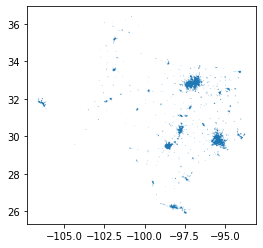

In [66]:
texas_urban_areas.plot()

In [67]:
texas_urban_areas.to_file('/Users/kpierce/CooksProTX/spatial/tigris/texas_urban_areas.shp')